# Load Info

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer #Libreria de pre procesamiento

In [39]:
# Esta linea permite que los graficos sean renderizados directamente en nuestro Notebook
## Carguemos en un pandas dataframe nuestra base de datos
%matplolib inline

UsageError: Line magic function `%matplolib` not found.


In [40]:
movies = pd.read_csv(r'C:\Scripts\Proyectos\Predicción_de_ingresos_peliculas\Data\peliculas.csv') #Base inicial del proyecto
financials = pd.read_csv(r'C:\Scripts\Proyectos\Predicción_de_ingresos_peliculas\Data\thenumbers.csv') #Valores de ingreso y el presupuesto reales
gross_opening = pd.read_csv(r'C:\Scripts\Proyectos\Predicción_de_ingresos_peliculas\Data\opening_df.csv')

In [41]:
movies['cast_total_facebook_likes'] = movies['cast_total_facebook_likes'].astype(int)

In [42]:
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [43]:
movies.shape

(5043, 19)

In [44]:
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

# Data inspection phase

In [45]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

## Column separation according to type

In [46]:
# Seleccionamos las columnas de tipo numérico

num = (movies.dtypes == float) | (movies.dtypes == int)
num_cols = [c for c in num.index if num[c]]
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [47]:
# Se seleccionan las columnas de tipo texto

obj = movies.dtypes == object
obj_cols = [c for c in obj.index if obj[c]]
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

Para la primera iteración solo se tomaran las columnas de tipo numérico lo que permite tener una visión estadistica un poco más precisa para las iteraciones posteriores.

# Quantitative Inspection

In [48]:
movies_num = movies[num_cols]

## Estadisticas de las columnas numéricas

In [49]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


<AxesSubplot:>

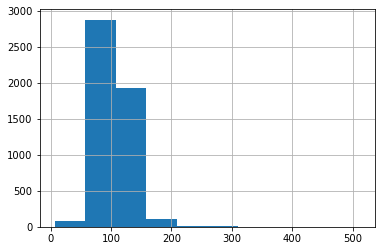

In [50]:
movies_num['duration'].hist() # Distribución de tiempos peliculas

<AxesSubplot:>

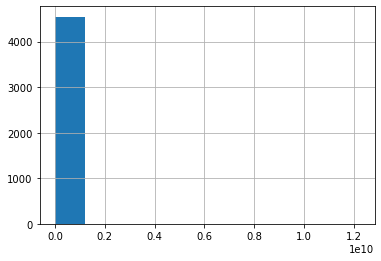

In [51]:
movies_num['budget'].hist() #Score de cada pelicula

<AxesSubplot:>

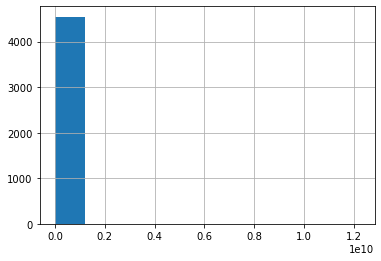

In [52]:
movies_num['budget'].hist() #Presupuesto cada pelicula
# De esto se determina que algo extraño ocurre con los datos


Debido a esto se procede a realizar un ajuste inicial sobre la columna 'budget'.

In [53]:
#Se identifica que peliculas tienen presupuesto mayor a 1 billon
(movies_num['budget'] > 1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [54]:
mask = movies_num['budget'] > 1e9
movies[mask]

# De esto se determina que las peliculas en su mayoria son asiaticas y que su presupuesto esta en yenes por lo cual se deben ajustar los datos.
# Adicionalmente se dtermina que es posible que no se conozca el valor real de los datos de ganancia e inversión.

# Para este caso puntual se tendria que hacer un nuevo proceso de scraping o buscar nuevas fuentes de datos para ajustar la información con valores reales.

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [55]:
#Seleccionamos de Financials las columna de interes para poder hacer un merge con la base de movies.T

financials = financials[['movie_title','production_budget','worldwide_gross']]
print(financials.shape)
print(movies.shape)

(4341, 3)
(5043, 19)


Se presenta una diferencia de 700 datos aproximadamente, sin embargo debido a la calidad de los mismos se opta por hacer el remplazo de las variables afectadas y tener datos de calidad.

Adicionalmente se agrega el id para el merge al data frame movies_num.

In [56]:
movies_num = pd.concat([movies_num,movies['movie_title']],axis=1) #Se agrega la llave para el merge, se debe tener en cuenta que el axis 1 agrega los valores fila a fila.

In [57]:
movies_v2 = pd.merge(financials,movies_num,on='movie_title',how='left') #Se tiene un df basado en financial donde se tienen los datos limpios y completos.

In [58]:
gross_opening = gross_opening.drop('Unnamed: 0',axis=1) #Se agregan las variables faltantes

In [59]:
movies_v2 = pd.merge(movies_v2,gross_opening,on='movie_title',how='left')

In [60]:
movies_v2.shape

(4385, 13)

# Handling null data

In [61]:
movies_v2.notnull().apply(pd.Series.value_counts) # Se cuentan los valores null por cada columna

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671,2106,2164
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714,2279,2221


In [62]:
(movies_v2 != 0).apply(pd.Series.value_counts) #Se validan los valores diferentes a 0

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0,4385.0,4385.0


In [63]:
available = ((movies_v2 != 0) & (movies_v2.notnull())) #Se crea una mascara de diferente a 0 y notnull

In [64]:
available.all(axis=1).value_counts() #Valida si hay filas con valores falsos

False    2252
True     2133
dtype: int64

No es recomendableentrenar nuestro algoritmo con datos cuya variable objetivo no esta definida o sea nula (valor falso).Por lo cual se procede a eliminar esos registros.

In [65]:
mask = available['worldwide_gross'] # Se realiza el filtro de estos valores
movies_v2 = movies_v2[mask]

In [66]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts() # Se hace la validación

True    4104
Name: worldwide_gross, dtype: int64

Posterior a esta limpieza se hace un tratamiento posterior por medio de pre prosesing de sklearn

In [67]:
#Se quitan las columnas que no son necesarias en el análisis

movies_v2 = movies_v2.drop('movie_title',axis=1)
movies_v2 = movies_v2.drop('duration',axis=1)
movies_v2 = movies_v2.drop('gross',axis=1)

In [68]:
imputer = SimpleImputer(missing_values = np.nan, strategy='mean') #Reamplaza los valores nulos por la media de la columna

In [69]:
values = imputer.fit_transform(movies_v2) # Se aplica el metodo por medio de fit

In [70]:
X = pd.DataFrame(values)
X.columns = movies_v2.columns
X.index = movies_v2.index
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.702548e+07,3452.000000
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,1.769568e+07,2244.456101
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,1.398022e+08,4362.000000
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,7.040315e+07,3929.000000
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,1.608873e+08,4404.000000


In [71]:
'''X = X[['production_budget', 'worldwide_gross', 'title_year', 'aspect_ratio',
       'duration.1', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'opening_gross']]'''

"X = X[['production_budget', 'worldwide_gross', 'title_year', 'aspect_ratio',\n       'duration.1', 'cast_total_facebook_likes', 'budget', 'imdb_score',\n       'opening_gross']]"

In [72]:
#X.to_csv(r'C:\Scripts\Proyectos\Predicción_de_ingresos_peliculas\Data\X_opening_f.csv',index=False)

# Validaciones adicionales sobre los datos

Se valida que las variables sean independientes dada la matriz de correlación

<AxesSubplot:>

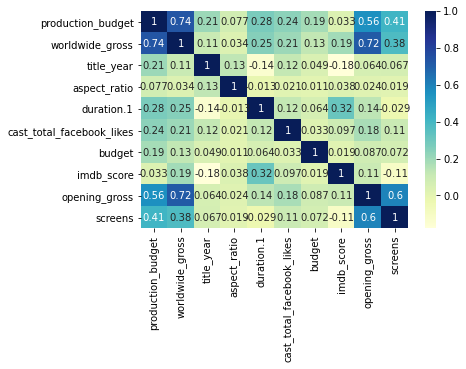

In [73]:
sns.heatmap(X.corr(),cmap="YlGnBu",annot=True)

Del mismo se puede identificar que las variables tienden a ser independientes, esto debido a las diversas correlaciones entre variables.